In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [146]:
df = pd.read_csv('./data/interpolated_data.csv')
df.head(5)
# Make sure Time Period is the index
df = df.set_index('Time Period')
df

,KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier),KPSA3 All retailing excl. automotive fuel (%-change on previous month),Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1988-01-01,2.0,-2.3,8.6,21.1,1.5,6.70,4.10,169.9,46.9
1988-02-01,2.0,-2.3,9.5,13.7,1.1,6.70,3.90,90.3,87.7
1988-03-01,2.0,0.4,8.2,18.5,2.0,8.20,5.10,126.6,89.2
1988-04-01,2.0,1.5,5.2,9.1,3.3,11.00,7.10,52.8,128.7
1988-05-01,2.0,-0.3,0.5,10.8,6.0,15.00,10.50,58.5,190.7
...,...,...,...,...,...,...,...,...,...
2023-08-01,-1.4,0.5,0.0,14.5,11.4,19.30,15.30,89.1,148.1
2023-09-01,-1.5,-1.3,0.0,13.5,11.0,19.40,15.20,119.4,142.4
2023-10-01,-2.4,-0.1,1.1,16.9,7.6,14.00,10.80,171.5,84.8


In [148]:
# rename columns so easier to access with .loc function
df = df.rename(columns={'KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier)':'KPSA1',
                        'KPSA3 All retailing excl. automotive fuel (%-change on previous month)':'KPSA3'
    })
df

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1988-01-01,2.0,-2.3,8.6,21.1,1.5,6.70,4.10,169.9,46.9
1988-02-01,2.0,-2.3,9.5,13.7,1.1,6.70,3.90,90.3,87.7
1988-03-01,2.0,0.4,8.2,18.5,2.0,8.20,5.10,126.6,89.2
1988-04-01,2.0,1.5,5.2,9.1,3.3,11.00,7.10,52.8,128.7
1988-05-01,2.0,-0.3,0.5,10.8,6.0,15.00,10.50,58.5,190.7
...,...,...,...,...,...,...,...,...,...
2023-08-01,-1.4,0.5,0.0,14.5,11.4,19.30,15.30,89.1,148.1
2023-09-01,-1.5,-1.3,0.0,13.5,11.0,19.40,15.20,119.4,142.4
2023-10-01,-2.4,-0.1,1.1,16.9,7.6,14.00,10.80,171.5,84.8


# Statistical analysis
Identify key series of the dataset and provide statistical summary of the data,
including:
- Measures of central tendency
- Measures of spread
- Type of distribution
This can be done by using libraries such as NumPy, pandas and SciPy. Most likely
the dataset will consist of multiple series.

A statistical analysis of this dataset can help us highlight patterns and trends in these time series, and therefore to focus in on what we want to present and how. We will begin by looking at the univariate statistics for these time series before proceeeding to look at the correlations between the weather and the sales percentage changes in volume.

## Measures of Central Tendency

As explained in the introduction, both the sales volume figures recorded by the Office of National Statistics used here and the Met Office weather records are a sample of the total population of these figures. The MetOffice weather data is based on a 1kmx1km grid-interpolation of weather metrics over the land surface of the UK, and it is important to remember that these data are estimates of the real weather averages in the UK during these months. Here, we will assume that this sample is representative of the population as a whole. [NB](https://pub.towardsai.net/here-is-why-you-probably-use-numpy-std-incorrectly-276c40aaf82e#:~:text=Explaining%20np.&text=std%20and%20pandas%20std%20functions,5): Pandas standard deviation function automatically uses Bessel's correction to adapt this function to samples of the population by dividing by N-1 rather than N.

In [149]:
# The first thing to do is ensure that the index loaded from the csv file is a DatetimeIndex, otherwise it is impossible
# to compute statisitcs for months
df.index = pd.to_datetime(df.index)

In [150]:
# Here we can see the mean, standard deviation and percentile values for all the time series in the dataset, as well as the minimum
# and maximum values. As we can see, the standard deviation is higher for the %-change in retail sales on the same month a year earlier than
# the percentage-change on the previous month, which seems reasonable, as it is expected that there would be more variation from year-to-year
# than from month to month.
# The hours of sunshine time series has an exceptionally high standard deviation compared to the other weather values.
df.describe() 

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,1.988426,0.160648,4.418519,13.243287,5.540278,12.817917,9.158819,96.939815,117.941667
std,3.489528,1.586567,5.245980,4.136253,3.797135,4.852409,4.289671,40.461759,56.726204
min,-18.400000,-14.700000,0.000000,4.000000,-4.100000,2.400000,-0.900000,18.400000,21.400000
25%,0.500000,-0.400000,0.000000,10.400000,2.200000,8.400000,5.300000,66.900000,65.500000
50%,2.100000,0.200000,2.500000,13.200000,5.150000,12.400000,8.750000,93.100000,116.850000
75%,3.700000,0.800000,7.325000,15.925000,9.000000,17.225000,13.100000,120.300000,160.875000
max,36.100000,12.800000,32.500000,38.600000,12.700000,23.300000,17.800000,285.200000,266.900000


In [154]:
# Now compute the median for each column as well as the mean, as this measure of central tendency is less prone to being 
# affected by outliers than the mean
median_scores = df.iloc[:, 0:].median() # use iloc to exclude the datetime index
print(median_scores)

KPSA1                        2.10
KPSA3                        0.20
Days Of Airfrost             2.50
Days With Over 1Mm Rain     13.20
Min Temperature (C)          5.15
Max Temperature (C)         12.40
Mean Temperature (C)         8.75
Rainfall In Mm              93.10
Hours Of Sunshine          116.85
dtype: float64


In [155]:
# Calculate interquartile range per column
interquartile_range = df.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
interquartile_range

KPSA1                       3.200
KPSA3                       1.200
Days Of Airfrost            7.325
Days With Over 1Mm Rain     5.525
Min Temperature (C)         6.800
Max Temperature (C)         8.825
Mean Temperature (C)        7.800
Rainfall In Mm             53.400
Hours Of Sunshine          95.375
dtype: float64

In [157]:
# Shorten names of columns to fit on the plots made in the next cells to visualize distributions of data and box-and-whisker plots
# for detecting outliers
plot_titles = ['KPSA1', 'KPSA3']
plot_titles.extend(df.columns[2:])
plot_titles

['KPSA1',
 'KPSA3',
 'Days Of Airfrost',
 'Days With Over 1Mm Rain',
 'Min Temperature (C)',
 'Max Temperature (C)',
 'Mean Temperature (C)',
 'Rainfall In Mm ',
 'Hours Of Sunshine']

In [158]:
# We will now create some histograms of this data to show and analyse the distributions of the data values
# Reference: how to calculate the right number of bins for histograms https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/

# 1. Get count of datapoints
count_of_datapoints = len(df) # 432 points
print(count_of_datapoints)

# 2. Get the square root of the number of datapoints and round up
nr_bins = int(np.ceil(np.sqrt(count_of_datapoints)))
print(nr_bins) # Number of bins


432
21


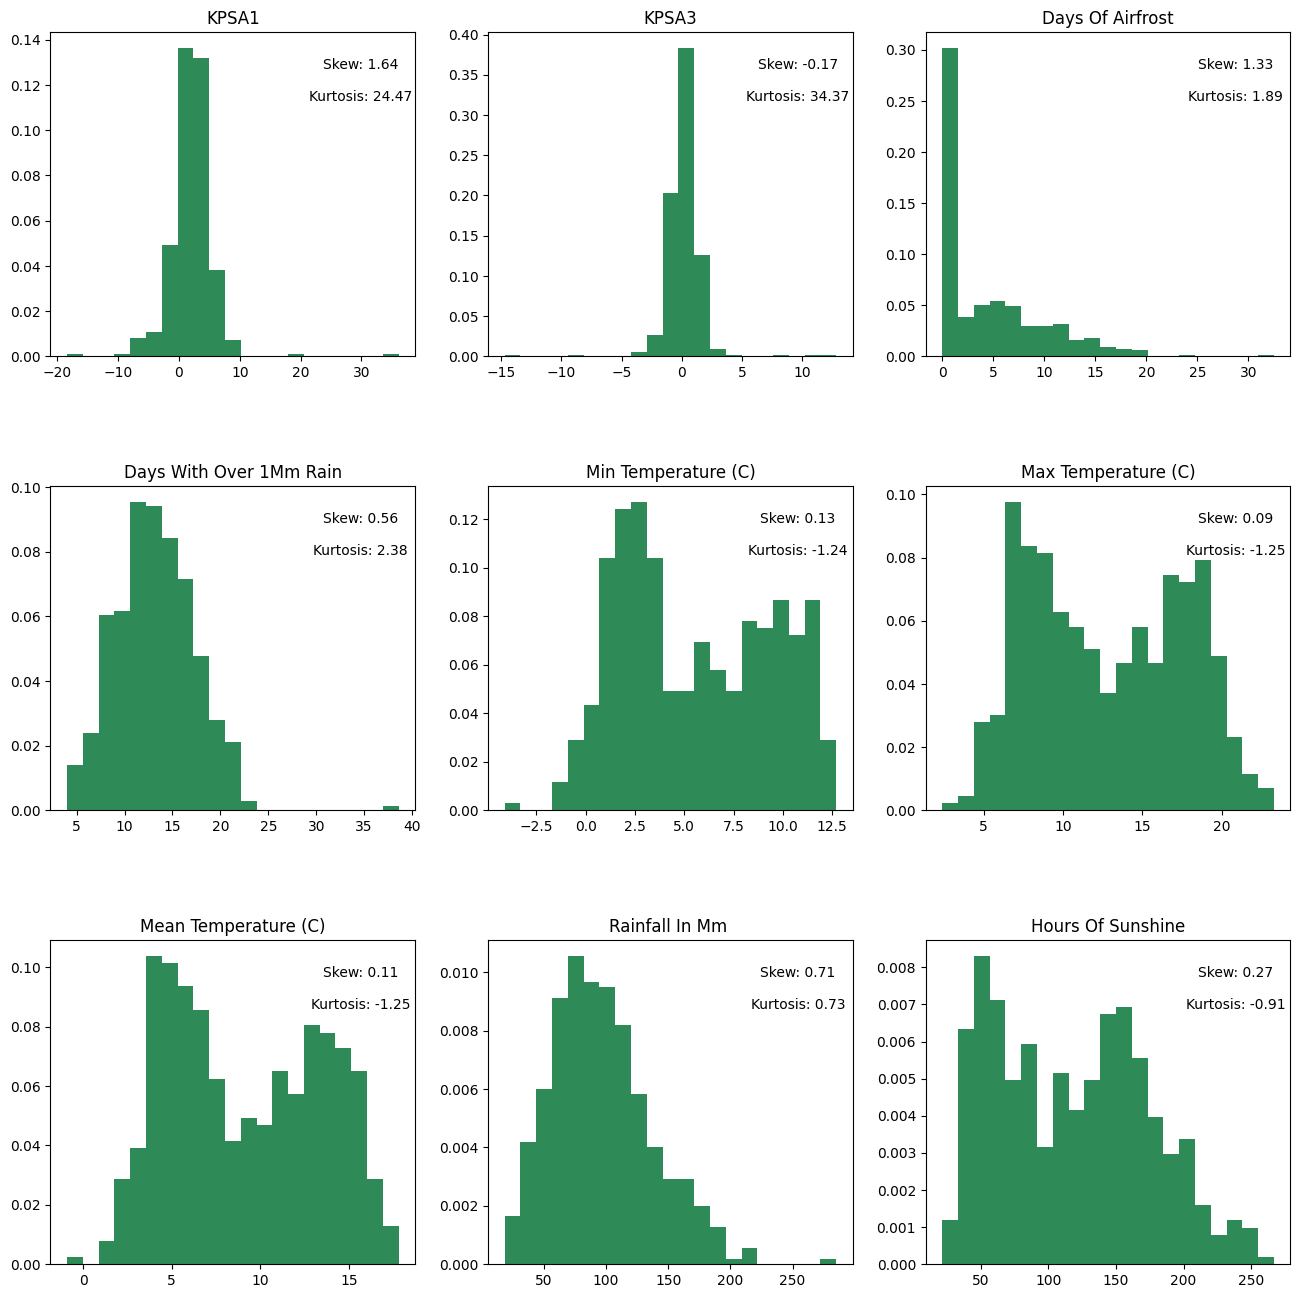

In [159]:
# Create fig and axes with matplotlib to plot histograms for all the 9 columns of time series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.hist(df.iloc[:, idx], bins=nr_bins, density=True, color='seagreen')
        axes[i, j].set_title(plot_titles[idx])

# Calculate the skewness and kurtosis of each distribution and annotate the graph with it
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # Calculate skewness for each variable
        skew = df.iloc[:, idx].skew().round(2)
        # Calculate kurtosis for each column
        kurtosis = df.iloc[:, idx].kurtosis().round(2)
        # Position the 'skew' annotation at the top-right of each plot
        skew_annotation_x = 0.85
        skew_annotation_y = 0.9
        # Position the 'kurtosis' annotion just underneath the skew annotation
        kurtosis_annotation_x = 0.85
        kurtosis_annotation_y = 0.8
        ax.annotate(f"Skew: {skew}", xy=(skew_annotation_x, skew_annotation_y), xycoords='axes fraction', ha='center', va='center')
        ax.annotate(f"Kurtosis: {kurtosis}", xy=(kurtosis_annotation_x, kurtosis_annotation_y), xycoords='axes fraction', ha='center', va='center')

### Analysis of Distributions, Skew and Kurtosis values

As we can see above, only two of these variables approach anything close to a normal distribution (days with over 1mm rain and rainfall in mm), while the others are skewed and do not follow a normal distribution (where [values are distributed symmetrically around the mean](https://www.investopedia.com/terms/n/normaldistribution.asp)).

- **Sales Volume Distributions (KPA1 - % change on month the previous year and KPA3 - % change on the previous month):** as seen above, the distributions for the sales volume percentage changes are asymmetric. This means that the mean and median are [not equal](https://ceopedia.org/index.php/Asymmetrical_distribution), and is common for this kind of real-world data such as sales or stock prices. The disadvantage of this type of distribution is that it can be harder to [predict values due to the potential for extreme values](https://ceopedia.org/index.php/Asymmetrical_distribution). KPA1 (percentage change in retail sales volume on the same month the previous year) has a positive skew of 1.64, meaning that more values lie to the right than to the left of the mean, while KPA3 (percentage change in retail sales volume on the previous month) has a negative skew of -0.17, meaning that slightly more values lie to the left of the mean. What is more concerning here though is that both these sets of values have an extremely high positive kurtosis values (24.47 for KPA1 and 34.37), describing the peaked shape and [heavy tail](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#:~:text=Positive%20kurtosis%20indicates%20heavier%20tails,the%20tailedness%20of%20a%20distribution.) of these distributions. This is known as a [leptokurtic distribution](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#What_Is_Excess_Kurtosis?) and is [often taken to be an indicator of outliers and extreme values](https://fastercapital.com/content/Leptokurtic--Unraveling-Negative-Kurtosis-and-Its-Interpretation.html). The presence of these outliers will be investigated further in the next section (using box-and-whisker plots). These outliers might either reflect extreme, sudden events which impact sales volume fluctuations, or might be due to an error in reporting. The problem with including these outliers in the linear regression model is that it might obscure the effect of weather fluctuations on sales, as the extreme event might have been caused by something completely unrelated to weather.

- **Days of Airfrost:** this distribution has a long peak at around 0-2 days of monthly airfrost, and then there is a decline in the number of entries with increasing days of airfrost per month, which although lacking a normal distribution, does not seem that unusual for the UK.

- **Temperature Distributions and Hours of Sunshine per month Distribution**: these distributions seem to have two peaks and indicate a [bimodal distribution](https://www.statisticshowto.com/what-is-a-bimodal-distribution/). The distributions have a relatively low kurtosis and therefore this does not seem to *necessarily* indicate the presence of **extreme values** which could be a problem for linear regression algorithms.

We can also plot the datapoints for each series as quantile-quantile plots in order to [check the distributions of the data points](https://www.yourdatateacher.com/2021/06/21/how-to-use-q-q-plot-for-checking-the-distribution-of-our-data/).  A QQ plot is a 2D visualization where the quantiles of a specific distribution (e.g. a normal distribution) are compared against the quantiles of our specific datasets. A y=x 45-degree line means that the distributions are the same, whereas curved or S-shape lines mean that the distribution is very different:

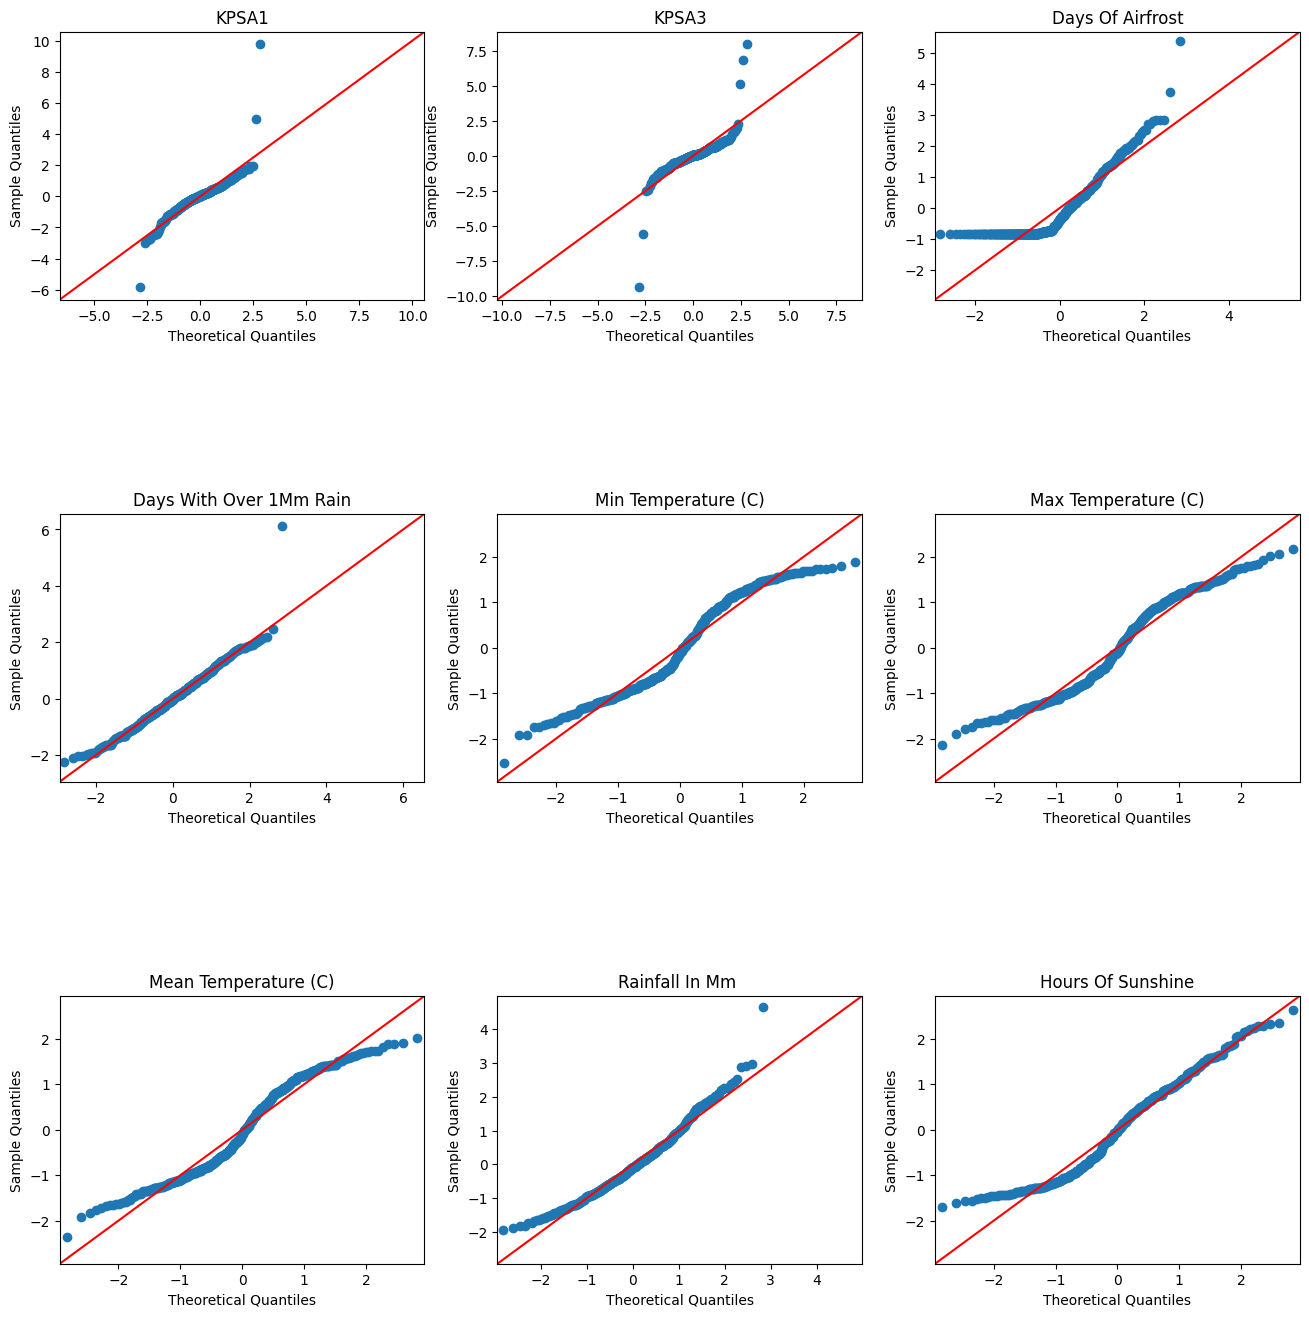

In [160]:
import statsmodels.api as sm 
# Reference: https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

# Make the results deterministic by seeding a value into numpy.random
np.random.seed(1234)

# Create 432 (size of our time series) normally-distributed points for comparing series' distribution to normal distribution
# Mean: 0, standard deviation: 1
data_points = np.random.normal(0, 1, len(df))  

# Create the subplots
fig, axes = fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.8) 

# Iterate over axes object and df columns using basic index calculations for the 9 cols
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # The default distribution to compare against is Gaussian normal distribution
        # Pass in ax to plot on the correct subplot
        # Set fit=True If fit is True to fit parameters automatically using dist.fit (Ref: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)
        sm.qqplot(df.iloc[:, idx], line='45', ax=ax, fit=True)
        ax.set_title(f'{plot_titles[idx]}')



The QQ plots show once again that most of the time series do not follow a normal distribution except for the rainfall data, which is roughly normal, as the values lie mostly on the 45-degree line. As this might indicate the presence of extreme values/outliers, especially in the KPA series, the presence of such anomolous values should be investigated further:

In [59]:
# To help identify outliers in the time series, we will now use tukey plots (like a box-and-whisker plot) which
# helps us identify the outliers (which we saw earlier during the interpolation phase)

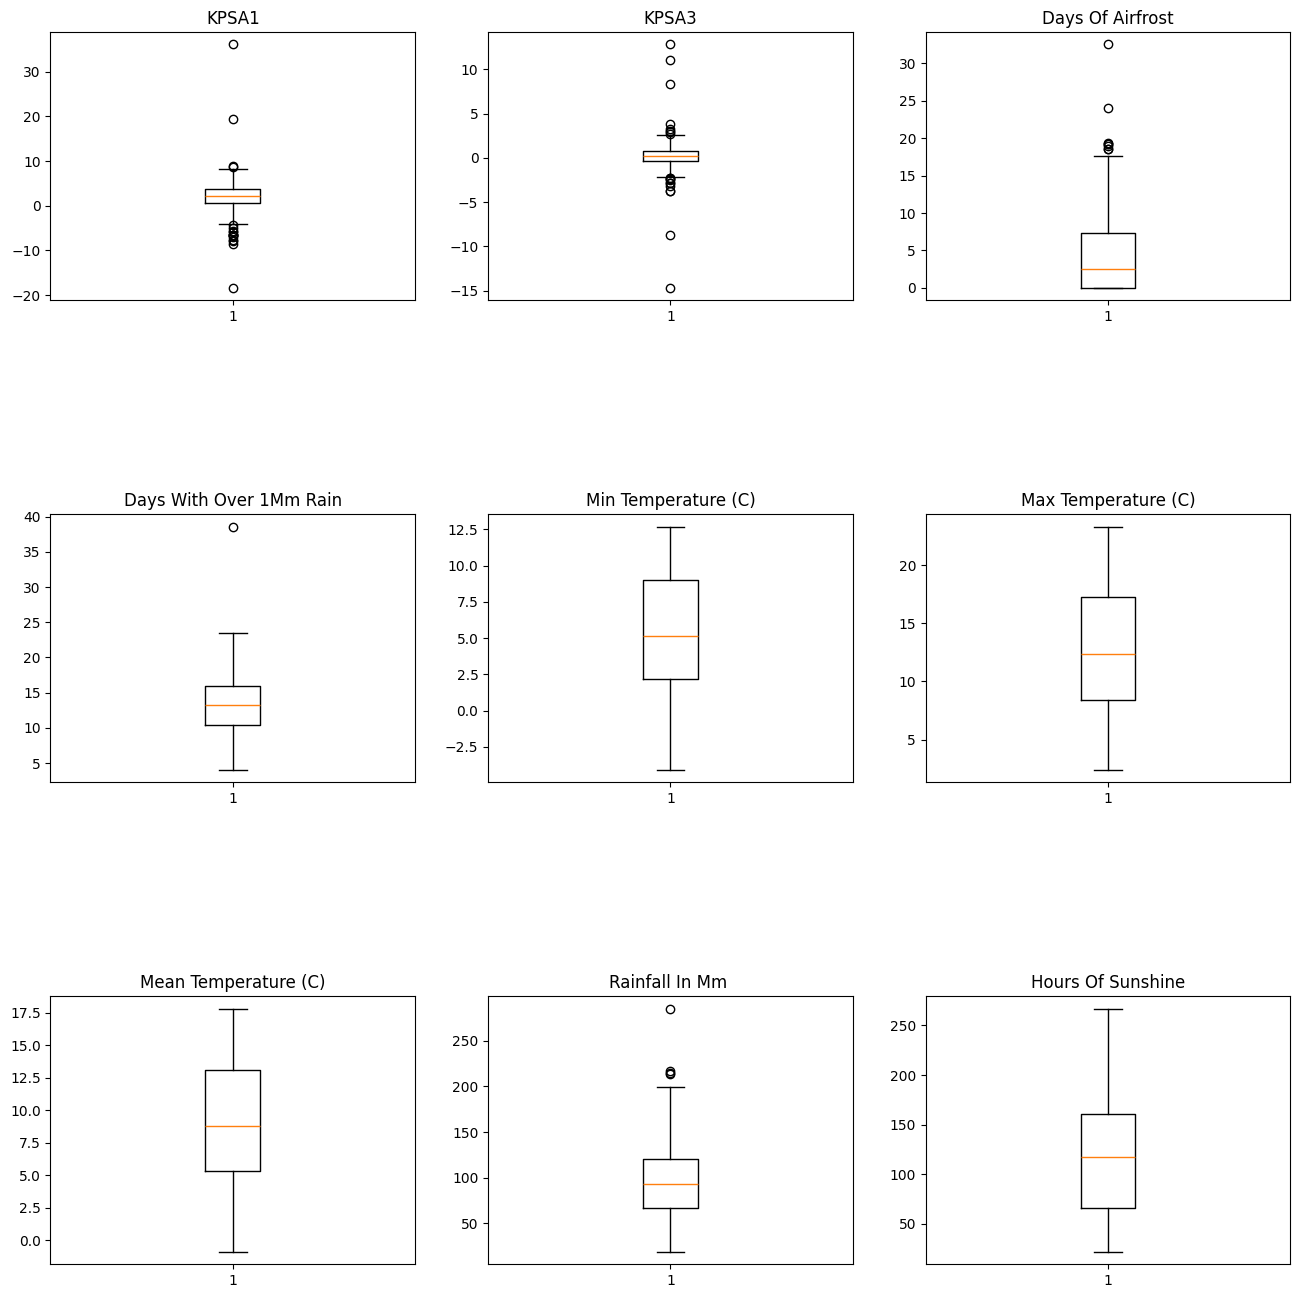

In [161]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.8) 

for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.boxplot(df.iloc[:, idx])
        axes[i, j].set_title(plot_titles[idx])

As can be seen above, the percentage-changes in sales volume contain a lot of outlier values and a small inter-quartile range - while the weather data, with the exception of a couple of outliers for rainfall, seems to have relative few outliers and a large inter-quartile range (meaning that half the values in the dataset fall into this range). Outliers are values which deviate [from most of the other values](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/). Visualization allows us easily to see just how many outliers there are in the sales data! Outliers can be [a problem for machine learning algorithms](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.), particularly regression algorithms, making the [regression lines less accurate in making predictions](https://study.com/skill/learn/identifying-the-effects-of-removing-outliers-on-regression-lines-explanation.html). There are [many different methods](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.) for removing these outliers. One of these options is deleting the outliers, but this is has its disadvantages when we already have a relatively small datasets and we don't want to waste any values. Furthermore, as we are working with time-series data, this would introduce jumps and missing values between months, which is not ideal for the linear regression exercise here, as it can reduce the algorithm's ability to detect how patterns develop over time. Moreover, it could be the case that the extreme values in the sales data are actually a reflection of meaningful events rather than measurement errors, in which case, removing them would eliminate the ability to make meaningful conclusions as to the impact of weather data on sales changes. As a result, we will create a copy of this dataset where the outliers are removed and [replaced with the median - less sensitive to outliers than the mean -](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.), so not to lose any data. Then, the linear regression algorithm will be run on both datasets and the performance of the algorithm compared.

In [162]:
## We can detect outliers by checking if a data value is above or below a threshold based on the interquartile range,
## usually defined as quartile1 - 1.5*IQR for values below and quartile3 + 1.5*IQR for values above
## We will also use the pandas groupby function to calculate interquartile range per month, and replace outliers with median for that month,
## to account for the fact that some months might naturally have more variation and unique characteristics which do not apply to the whole dataset
## (e.g. April tends to have more variation in days of airfrost than say, July or August does!)

# Calculate quartiles and interquartile range per month, so quartiles for ever January combined, every February combined, etc.
monthly_quartiles = df.groupby(df.index.month).quantile([0, 0.25, 0.5, 0.75, 1.0])
monthly_quartiles

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                                   
1           0.00  -5.900  -8.700             4.700                    5.700   
            0.25   0.450  -0.975             8.100                   12.250   
            0.50   2.200   0.050            10.450                   15.650   
            0.75   3.400   1.200            14.200                   19.600   
            1.00   8.000   2.300            19.000                   23.500   
2           0.00  -4.000  -2.300             4.000                    6.000   
            0.25   0.850  -0.425             6.475                   10.375   
            0.50   2.350   0.250             9.550                   13.550   
            0.75   3.625   1.225            13.100                   16.100   
            1.00   7.100   2.900            19.300                   21.400   
3           0.00  -4.900  -3.800             3.100                    6.300   
            0.25   0.775  -0.350             5.200                   10.650   
            0.50   1.950   0.250             7.000                   12.200   
            0.75   4.225   0.725             8.575                   16.100   
            1.00   7.800   3.800            19.200                   20.400   
4           0.00 -18.400 -14.700             0.500                    4.000   
            0.25   0.300  -0.425             3.000                    8.175   
            0.50   1.700   0.300             4.350                   11.450   
            0.75   3.850   0.825             5.850                   14.275   
            1.00  36.100   8.300            13.700                   19.100   
5           0.00  -8.500  -2.500             0.000                    5.200   
            0.25   0.575  -0.525             0.475                    8.450   
            0.50   2.100   0.100             0.650                   10.950   
            0.75   3.925   1.125             1.725                   13.750   
            1.00  19.400  11.000             4.300                   16.900   
6           0.00  -6.900  -3.700             0.000                    4.900   
            0.25   1.025  -0.425             0.000                    8.900   
            0.50   2.450   0.200             0.000                   10.650   
            0.75   3.525   0.600             0.100                   14.275   
            1.00   6.800  12.800             0.500                   18.100   
7           0.00  -3.800  -2.900             0.000                    6.400   
            0.25   0.850  -0.100             0.000                    9.275   
            0.50   2.200   0.150             0.000                   11.550   
            0.75   3.600   0.800             0.000                   14.425   
            1.00   7.700   2.700             0.000                   20.600   
8           0.00  -5.600  -1.600             0.000                    4.600   
            0.25   0.725  -0.200             0.000                   11.175   
            0.50   2.250   0.150             0.000                   13.200   
            0.75   3.275   0.525             0.000                   14.725   
            1.00   6.400   2.000             0.100                   18.300   
9           0.00  -6.500  -1.300             0.000                    4.800   
            0.25   0.325  -0.225             0.000                   10.075   
            0.50   2.450  -0.100             0.000                   12.700   
            0.75   3.525   0.400             0.200                   13.625   
            1.00   7.300   2.000             0.600                   18.000   
10          0.00  -6.500  -1.200             0.000                    8.100   
            0.25   0.075  -0.325             0.300                   12.700   
            0.50   2.150   0.300             0.550                   15.750   
            0.75   3.925   0.725             2.500                   

In [163]:
# Do the same for interquartile range by using an anon-function to calculate differences between upper and lower quartiles for each column
monthly_iqrs = df.groupby(df.index.month).apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
monthly_iqrs

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1,2.950,2.175,6.100,7.350,1.125,1.525,1.300,60.825,10.050
2,2.775,1.650,6.625,5.725,1.650,1.550,1.725,48.000,19.575
3,3.450,1.075,3.375,5.450,1.325,1.200,1.375,34.725,32.025
4,3.550,1.250,2.850,6.100,1.025,1.775,1.350,41.575,35.600
5,3.350,1.650,1.250,5.300,1.125,1.500,1.300,45.600,35.100
6,2.500,1.025,0.100,5.375,1.300,1.375,1.400,43.100,38.750
7,2.750,0.900,0.000,5.150,1.275,2.100,1.825,40.100,41.600
8,2.550,0.725,0.000,3.550,1.200,1.250,1.100,29.550,26.475
9,3.200,0.625,0.200,3.550,1.175,1.450,1.025,38.525,21.925


In [164]:
# Calculate medians per month too
monthly_medians = df.groupby(df.index.month).median()
monthly_medians

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1,2.20,0.05,10.45,15.65,1.45,6.70,4.050,123.50,48.15
2,2.35,0.25,9.55,13.55,1.30,7.30,4.450,89.10,70.80
3,1.95,0.25,7.00,12.20,2.35,9.55,6.050,86.30,109.35
4,1.70,0.30,4.35,11.45,3.55,11.80,7.850,67.75,155.20
5,2.10,0.10,0.65,10.95,6.40,15.10,10.750,64.60,191.05
6,2.45,0.20,0.00,10.65,9.10,17.70,13.250,65.60,170.15
7,2.20,0.15,0.00,11.55,11.10,19.40,15.250,77.40,166.45
8,2.25,0.15,0.00,13.20,11.10,19.30,15.150,87.45,158.45
9,2.45,-0.10,0.00,12.70,8.90,16.90,12.850,94.70,127.05


In [174]:
# Create a new dataframe for storing the times series with outliers replaced by the median
df_without_outliers = df.copy()
df_without_outliers

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1988-01-01,2.0,-2.3,8.6,21.1,1.5,6.70,4.10,169.9,46.9
1988-02-01,2.0,-2.3,9.5,13.7,1.1,6.70,3.90,90.3,87.7
1988-03-01,2.0,0.4,8.2,18.5,2.0,8.20,5.10,126.6,89.2
1988-04-01,2.0,1.5,5.2,9.1,3.3,11.00,7.10,52.8,128.7
1988-05-01,2.0,-0.3,0.5,10.8,6.0,15.00,10.50,58.5,190.7
...,...,...,...,...,...,...,...,...,...
2023-08-01,-1.4,0.5,0.0,14.5,11.4,19.30,15.30,89.1,148.1
2023-09-01,-1.5,-1.3,0.0,13.5,11.0,19.40,15.20,119.4,142.4
2023-10-01,-2.4,-0.1,1.1,16.9,7.6,14.00,10.80,171.5,84.8


In [165]:
# Use the monthly quartiles dataframe calculated above to calculate upper and lower threshold values for each month and column
# for which the value would be an outlier

# Lists to store a dict for each column storing the monthly lower and upper outlier-thresholds based on IQR
lower_thresholds = []
upper_thresholds = []

# Iterate over the time-series/columns in the quartiles dataframe
for column in monthly_quartiles.columns:
    # Create dicsts to store the monthly thresholds for each column in the dataframe (key will be month nr, and values will be the thresholds)
    column_lower_thresholds = {}
    column_upper_thresholds = {}
    # Iterate over the month inner index using the loc function and the number of the month
    for i in range(1, 13):
        quartiles_for_month = monthly_quartiles[column].loc[i, :]
        # Use .loc to get the 1st and 3rd quartiles for each aggregated month for each column
        lower_quartile = quartiles_for_month.loc[0.25]
        upper_quartile = quartiles_for_month.loc[0.75]
        iqr = upper_quartile - lower_quartile
        # Ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
        # Calculate the threshold for outliers using the upper and lower quartiles
        lower_threshold = lower_quartile - (1.5 * iqr)
        upper_threshold = upper_quartile + (1.5 * iqr)
        # Create a dict-key in the column_lower_thresholds and column_upper_thresholds dicts defined outside this for-loop
        # Each dict key-value pair for these dicts contains the month nr (integer) and the threshold value as the value in the associative array
        column_lower_thresholds[i] = lower_threshold
        column_upper_thresholds[i] = upper_threshold
    # Add the monthly outlier threshold dicts for each column to the lists defined outside of these for-loops
    lower_thresholds.append({column: column_lower_thresholds})
    upper_thresholds.append({column: column_upper_thresholds})

print(lower_thresholds)
print(upper_thresholds)

[{'KPSA1': {1: -3.9749999999999996, 2: -3.3124999999999996, 3: -4.3999999999999995, 4: -5.0249999999999995, 5: -4.449999999999999, 6: -2.725, 7: -3.275, 8: -3.1000000000000014, 9: -4.475, 10: -5.699999999999999, 11: -2.8874999999999997, 12: -4.4375}}, {'KPSA3': {1: -4.2375, 2: -2.9000000000000004, 3: -1.9625, 4: -2.3, 5: -2.9999999999999996, 6: -1.9625, 7: -1.4500000000000002, 8: -1.2875, 9: -1.1625, 10: -1.9000000000000001, 11: -1.5624999999999998, 12: -2.1500000000000004}}, {'Days Of Airfrost': {1: -1.049999999999999, 2: -3.4625000000000004, 3: 0.13750000000000195, 4: -1.2749999999999995, 5: -1.4, 6: -0.15000000000000002, 7: 0.0, 8: 0.0, 9: -0.30000000000000004, 10: -3.0000000000000004, 11: -2.9499999999999993, 12: -1.2000000000000002}}, {'Days With Over 1Mm Rain': {1: 1.2249999999999979, 2: 1.7874999999999979, 3: 2.4749999999999943, 4: -0.9749999999999979, 5: 0.4999999999999982, 6: 0.8375000000000039, 7: 1.5499999999999998, 8: 5.849999999999998, 9: 4.749999999999998, 10: 5.499999999

In [166]:
# Convert thresholds list-of-dicts to a pandas DataFrame using a function

def convertListOfThresholdDictToDF(list_of_dicts, column_names): 
    # Extracts the monthly threshold values from each dictionary
    monthly_threshold_values = [list(column_dictionary.values())[0] for column_dictionary in list_of_dicts]
    # Create a new thresholds df for each column with the column names as the index and months as the columns for now
    thresholds_df = pd.DataFrame(monthly_threshold_values, column_names)
    # Transpose the new DataFrame, so that the column names per var are the columns and the months form the index
    return thresholds_df.transpose()

lower_thresholds_df = convertListOfThresholdDictToDF(lower_thresholds, plot_titles)
upper_thresholds_df = convertListOfThresholdDictToDF(upper_thresholds, plot_titles)
lower_thresholds_df

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
1,-3.9750,-4.2375,-1.0500,1.2250,-0.9375,3.7375,1.4500,1.5875,28.5250
2,-3.3125,-2.9000,-3.4625,1.7875,-1.9000,4.2250,0.8875,-1.7500,33.5375
3,-4.4000,-1.9625,0.1375,2.4750,-0.2125,7.1000,3.1875,17.4125,40.8625
4,-5.0250,-2.3000,-1.2750,-0.9750,1.4625,8.1875,4.9500,-14.0375,80.2500
5,-4.4500,-3.0000,-1.4000,0.5000,4.0125,12.3000,8.0500,-20.6250,120.6750
6,-2.7250,-1.9625,-0.1500,0.8375,6.5500,15.0875,10.6000,-13.3750,97.4500
7,-3.2750,-1.4500,0.0000,1.5500,8.4625,15.4500,11.6625,-1.1250,88.3000
8,-3.1000,-1.2875,0.0000,5.8500,8.6000,16.7000,12.8500,33.0000,108.3875
9,-4.4750,-1.1625,-0.3000,4.7500,6.7875,13.9250,10.8625,12.1875,83.6625
10,-5.7000,-1.9000,-3.0000,5.5000,2.7375,9.8375,6.3000,16.7625,55.8375


In [167]:
upper_thresholds_df

,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
1,7.8250,4.4625,23.3500,30.6250,3.5625,9.8375,6.6500,244.8875,68.7250
2,7.7875,3.7000,23.0375,24.6875,4.7000,10.4250,7.7875,190.2500,111.8375
3,9.4000,2.3375,13.6375,24.2750,5.0875,11.9000,8.6875,156.3125,168.9625
4,9.1750,2.7000,10.1250,23.4250,5.5625,15.2875,10.3500,152.2625,222.6500
5,8.9500,3.6000,3.6000,21.7000,8.5125,18.3000,13.2500,161.7750,261.0750
6,7.2750,2.1375,0.2500,22.3375,11.7500,20.5875,16.2000,159.0250,252.4500
7,7.7250,2.1500,0.0000,22.1500,13.5625,23.8500,18.9625,159.2750,254.7000
8,7.1000,1.6125,0.0000,20.0500,13.4000,21.7000,17.2500,151.2000,214.2875
9,8.3250,1.3375,0.5000,18.9500,11.4875,19.7250,14.9625,166.2875,171.3625
10,9.7000,2.3000,5.8000,24.7000,10.8375,16.5375,13.7000,238.6625,128.1375


In [168]:
# Create a Multi-Index on these two threshold dataframes in order to combine them for easier slicing and indexing
# Ref: https://pandas.pydata.org/docs/user_guide/advanced.html
# Ref: https://sparkbyexamples.com/pandas/pandas-multiindex-dataframe-examples/

## Turn the dataframe into the dataframe with a multi-index, with the inner index representing the type of threshold
def convertToMultiIndex(df, threshold_type):
    # Create a list of threshold name 12 times by *-ing the string and then splitting on the space character, then extracting the first 12 values
    multi_index_threshold_type = list((threshold_type * len(df)).split(' ')[0:len(df)])
    # Create list of the months from original dataframe
    multi_index_months = list(df.index)
    multi_index_arrays = [multi_index_months, multi_index_threshold_type]
    multi_index_tuples = list(zip(*multi_index_arrays))
    multi_index = pd.MultiIndex.from_tuples(multi_index_tuples)
    # Create new dataframe with the multiindex
    multi_index_df = pd.DataFrame(df.values, columns = df.columns, index = multi_index)
    return multi_index_df

# Apply the function to the lower thresholds dataframe
lower_thresholds_df_multi_index = convertToMultiIndex(lower_thresholds_df, 'LowerThreshold ')
lower_thresholds_df_multi_index

,,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
1,LowerThreshold,-3.9750,-4.2375,-1.0500,1.2250,-0.9375,3.7375,1.4500,1.5875,28.5250
2,LowerThreshold,-3.3125,-2.9000,-3.4625,1.7875,-1.9000,4.2250,0.8875,-1.7500,33.5375
3,LowerThreshold,-4.4000,-1.9625,0.1375,2.4750,-0.2125,7.1000,3.1875,17.4125,40.8625
4,LowerThreshold,-5.0250,-2.3000,-1.2750,-0.9750,1.4625,8.1875,4.9500,-14.0375,80.2500
5,LowerThreshold,-4.4500,-3.0000,-1.4000,0.5000,4.0125,12.3000,8.0500,-20.6250,120.6750
6,LowerThreshold,-2.7250,-1.9625,-0.1500,0.8375,6.5500,15.0875,10.6000,-13.3750,97.4500
7,LowerThreshold,-3.2750,-1.4500,0.0000,1.5500,8.4625,15.4500,11.6625,-1.1250,88.3000
8,LowerThreshold,-3.1000,-1.2875,0.0000,5.8500,8.6000,16.7000,12.8500,33.0000,108.3875
9,LowerThreshold,-4.4750,-1.1625,-0.3000,4.7500,6.7875,13.9250,10.8625,12.1875,83.6625
10,LowerThreshold,-5.7000,-1.9000,-3.0000,5.5000,2.7375,9.8375,6.3000,16.7625,55.8375


In [169]:
# Apply the function to the upper thresholds dataframe
upper_thresholds_df_multi_index = convertToMultiIndex(upper_thresholds_df, 'UpperThreshold ')
upper_thresholds_df_multi_index

,,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
1,UpperThreshold,7.8250,4.4625,23.3500,30.6250,3.5625,9.8375,6.6500,244.8875,68.7250
2,UpperThreshold,7.7875,3.7000,23.0375,24.6875,4.7000,10.4250,7.7875,190.2500,111.8375
3,UpperThreshold,9.4000,2.3375,13.6375,24.2750,5.0875,11.9000,8.6875,156.3125,168.9625
4,UpperThreshold,9.1750,2.7000,10.1250,23.4250,5.5625,15.2875,10.3500,152.2625,222.6500
5,UpperThreshold,8.9500,3.6000,3.6000,21.7000,8.5125,18.3000,13.2500,161.7750,261.0750
6,UpperThreshold,7.2750,2.1375,0.2500,22.3375,11.7500,20.5875,16.2000,159.0250,252.4500
7,UpperThreshold,7.7250,2.1500,0.0000,22.1500,13.5625,23.8500,18.9625,159.2750,254.7000
8,UpperThreshold,7.1000,1.6125,0.0000,20.0500,13.4000,21.7000,17.2500,151.2000,214.2875
9,UpperThreshold,8.3250,1.3375,0.5000,18.9500,11.4875,19.7250,14.9625,166.2875,171.3625
10,UpperThreshold,9.7000,2.3000,5.8000,24.7000,10.8375,16.5375,13.7000,238.6625,128.1375


In [170]:
combined_thresholds_df = pd.concat([lower_thresholds_df_multi_index, upper_thresholds_df_multi_index], axis=0)
combined_thresholds_df

,,KPSA1,KPSA3,Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
1,LowerThreshold,-3.9750,-4.2375,-1.0500,1.2250,-0.9375,3.7375,1.4500,1.5875,28.5250
2,LowerThreshold,-3.3125,-2.9000,-3.4625,1.7875,-1.9000,4.2250,0.8875,-1.7500,33.5375
3,LowerThreshold,-4.4000,-1.9625,0.1375,2.4750,-0.2125,7.1000,3.1875,17.4125,40.8625
4,LowerThreshold,-5.0250,-2.3000,-1.2750,-0.9750,1.4625,8.1875,4.9500,-14.0375,80.2500
5,LowerThreshold,-4.4500,-3.0000,-1.4000,0.5000,4.0125,12.3000,8.0500,-20.6250,120.6750
6,LowerThreshold,-2.7250,-1.9625,-0.1500,0.8375,6.5500,15.0875,10.6000,-13.3750,97.4500
7,LowerThreshold,-3.2750,-1.4500,0.0000,1.5500,8.4625,15.4500,11.6625,-1.1250,88.3000
8,LowerThreshold,-3.1000,-1.2875,0.0000,5.8500,8.6000,16.7000,12.8500,33.0000,108.3875
9,LowerThreshold,-4.4750,-1.1625,-0.3000,4.7500,6.7875,13.9250,10.8625,12.1875,83.6625
10,LowerThreshold,-5.7000,-1.9000,-3.0000,5.5000,2.7375,9.8375,6.3000,16.7625,55.8375


In [171]:
# Sort the dataframe by multi-index so the same months are consecutive to one another
combined_thresholds_df_sorted = combined_thresholds_df.sort_index(level=[0, 1])
combined_thresholds_df_sorted # Done! Now we're ready to apply these thresholds to replace outliers with the median

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  LowerThreshold -3.9750 -4.2375           -1.0500                   1.2250   
   UpperThreshold  7.8250  4.4625           23.3500                  30.6250   
2  LowerThreshold -3.3125 -2.9000           -3.4625                   1.7875   
   UpperThreshold  7.7875  3.7000           23.0375                  24.6875   
3  LowerThreshold -4.4000 -1.9625            0.1375                   2.4750   
   UpperThreshold  9.4000  2.3375           13.6375                  24.2750   
4  LowerThreshold -5.0250 -2.3000           -1.2750                  -0.9750   
   UpperThreshold  9.1750  2.7000           10.1250                  23.4250   
5  LowerThreshold -4.4500 -3.0000           -1.4000                   0.5000   
   UpperThreshold  8.9500  3.6000            3.6000                  21.7000   
6  LowerThreshold -2.7250 -1.9625           -0.1500                   0.8375   
   UpperThreshold  7.2750  2.1375            0.2500                  22.3375   
7  LowerThreshold -3.2750 -1.4500            0.0000                   1.5500   
   UpperThreshold  7.7250  2.1500            0.0000                  22.1500   
8  LowerThreshold -3.1000 -1.2875            0.0000                   5.8500   
   UpperThreshold  7.1000  1.6125            0.0000                  20.0500   
9  LowerThreshold -4.4750 -1.1625           -0.3000                   4.7500   
   UpperThreshold  8.3250  1.3375            0.5000                  18.9500   
10 LowerThreshold -5.7000 -1.9000           -3.0000                   5.5000   
   UpperThreshold  9.7000  2.3000            5.8000                  24.7000   
11 LowerThreshold -2.8875 -1.5625           -2.9500                   6.5375   
   UpperThreshold  7.2125  1.7375           13.2500                  23.6375   
12 LowerThreshold -4.4375 -2.1500           -1.2000                   2.1125   
   UpperThreshold  8.6625  2.2500           21.6000                  27.8125   

                   Min Temperature (C)  Max Temperature (C)  \
1  LowerThreshold              -0.9375               3.7375   
   UpperThreshold               3.5625               9.8375   
2  LowerThreshold              -1.9000               4.2250   
   UpperThreshold               4.7000              10.4250   
3  LowerThreshold              -0.2125               7.1000   
   UpperThreshold               5.0875              11.9000   
4  LowerThreshold               1.4625               8.1875   
   UpperThreshold               5.5625              15.2875   
5  LowerThreshold               4.0125              12.3000   
   UpperThreshold               8.5125              18.3000   
6  LowerThreshold               6.5500              15.0875   
   UpperThreshold              11.7500              20.5875   
7  LowerThreshold               8.4625              15.4500   
   UpperThreshold              13.5625              23.8500   
8  LowerThreshold               8.6000              16.7000   
   UpperThreshold              13.4000              21.7000   
9  LowerThreshold               6.7875              13.9250   
   UpperThreshold              11.4875              19.7250   
10 LowerThreshold               2.7375               9.8375   
   UpperThreshold              10.8375              16.5375   
11 LowerThreshold              -0.0375               6.2750   
   UpperThreshold               7.2625              12.4750   
12 LowerThreshold              -1.5125               4.0500   
   UpperThreshold               4.7875              10.2500   

                   Mean Temperature (C)  Rainfall In Mm   Hours Of Sunshine  
1  LowerThreshold                1.4500           1.5875            28.5250  
   UpperThreshold                6.6500         244.8875            68.7250  
2  LowerThreshold                0.8875          -1.7500            33.5375  
   UpperThreshold                7.7875         190.2500           111.8375  
3  LowerThreshold                3.1875          17.4

In [207]:
# Replace the outliers in the copy of the original dataframe with the median if the thresholds are exceeded
for month in range(1, 13):
    for col in df_without_outliers.columns:
        monthly_column_values = df_without_outliers[df_without_outliers.index.month == month].loc[:, col]
        # Now we can see that MultiIndex was worth the extra effort as can be used to easily index the correct threshold
        lower_threshold = combined_thresholds_df_sorted.loc[month, col].loc['LowerThreshold']
        upper_threshold = combined_thresholds_df_sorted.loc[month, col].loc['UpperThreshold']
        # Create a mask which: (1) gets all the rows for the current month being iterated over (2) checks the value is beyond the outlier thresholds
        boolean_mask = (df_without_outliers.index.month == month) & ((df_without_outliers[col] < lower_threshold) | (
            df_without_outliers[col] > upper_threshold
        ))
        # Replace the outliers with the median by getting the median for that month
        df_without_outliers.loc[boolean_mask, col] = monthly_medians.loc[month, col]

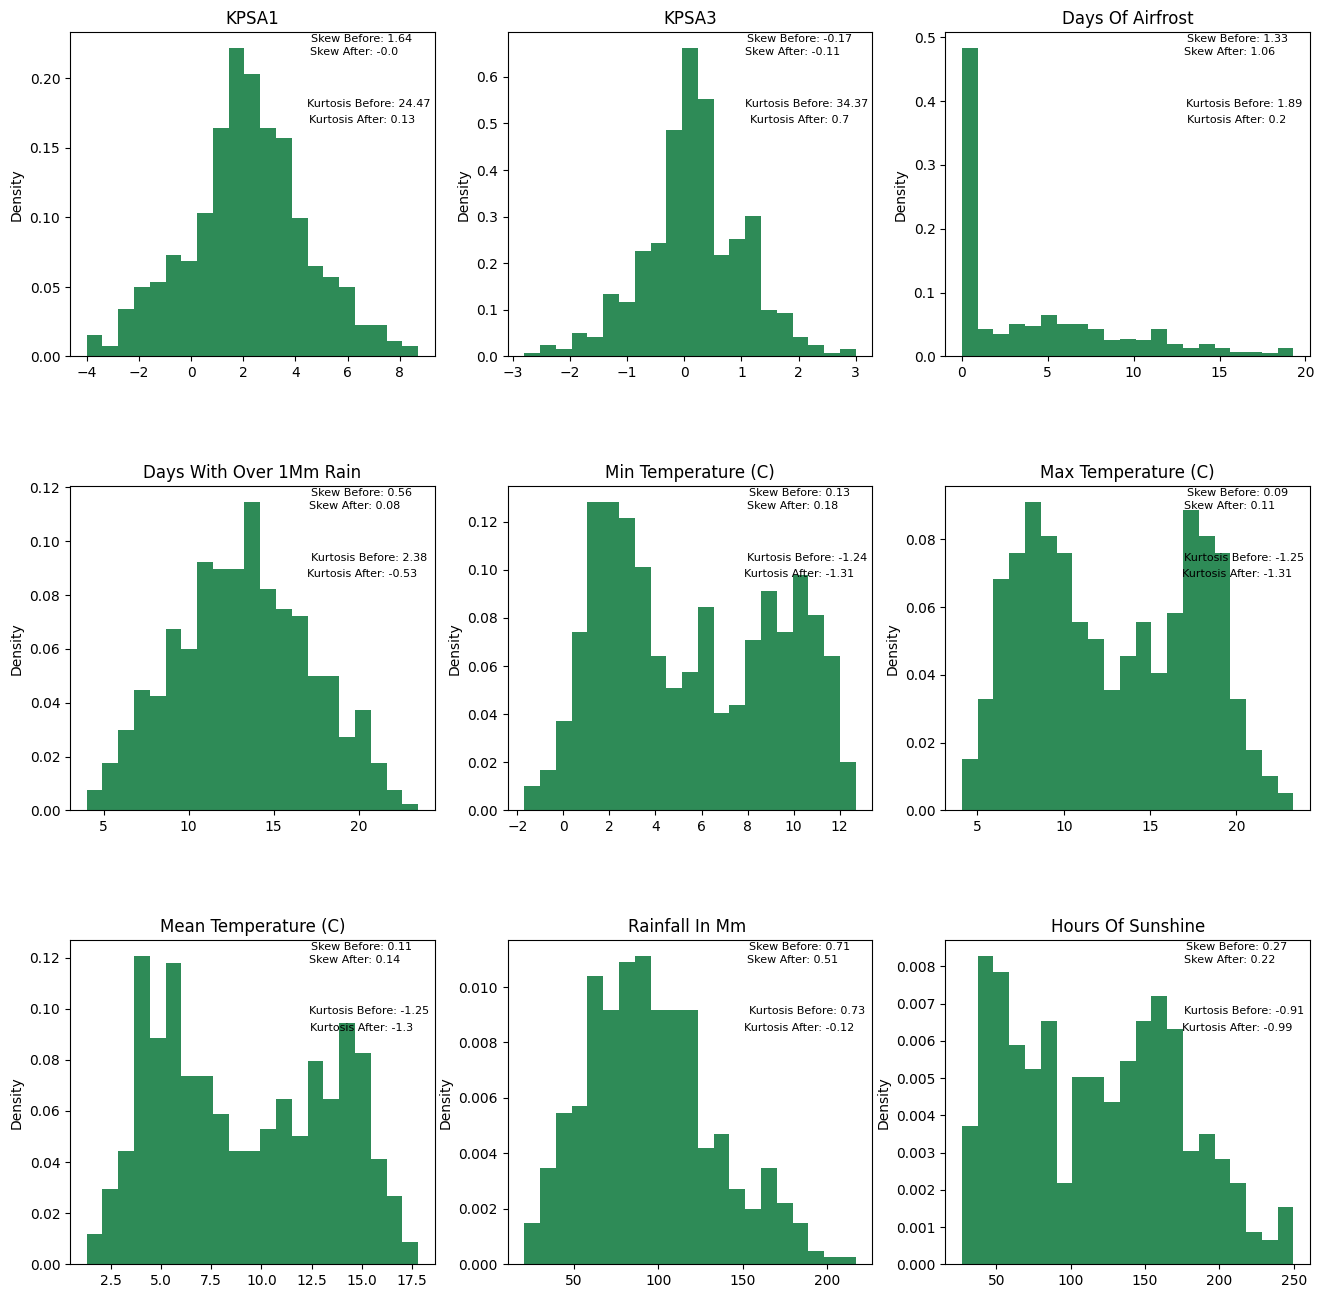

In [253]:
# Create fig and axes with matplotlib to plot histograms for all the 9 columns of time series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.hist(df_without_outliers.iloc[:, idx], bins=nr_bins, density=True, color='seagreen')
        ax.set_title(plot_titles[idx])
        ax.set_ylabel('Density')

# Calculate the skewness and kurtosis of each distribution and annotate the graph with it
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # Calculate skewness for each variable
        skew_before_removing_outliers = df.iloc[:, idx].skew().round(2)
        skew_after_removing_outliers = df_without_outliers.iloc[:, idx].skew().round(2)
        # Calculate kurtosis for each column
        kurtosis_before_removing_outliers = df.iloc[:, idx].kurtosis().round(2)
        kurtosis_after_removing_outliers = df_without_outliers.iloc[:, idx].kurtosis().round(2)
        # Position the 'skew' annotation at the top-right of each plot
        skew_annotation_x1 = 0.8
        skew_annotation_y1 = 0.98
        skew_annotation_x2 = 0.78
        skew_annotation_y2 = 0.94
        # Position the 'kurtosis' annotions just underneath the skew annotation
        kurtosis_annotation_x1 = 0.82
        kurtosis_annotation_y1 = 0.78
        kurtosis_annotation_x2 = 0.80
        kurtosis_annotation_y2 = 0.73
        fontsize = 8
        ax.annotate(f"Skew Before: {skew_before_removing_outliers}", xy=(skew_annotation_x1, skew_annotation_y1), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Kurtosis Before: {kurtosis_before_removing_outliers}", xy=(kurtosis_annotation_x1, kurtosis_annotation_y1), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Skew After: {skew_after_removing_outliers}", xy=(skew_annotation_x2, skew_annotation_y2), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Kurtosis After: {kurtosis_after_removing_outliers}", xy=(kurtosis_annotation_x2, kurtosis_annotation_y2), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)

As we can see through these histogram plots, the percentage-change in sales volume indicated by KPSA1 and KPSA2 is now much closer to a normal distribution, [which can help make Linear Regression inferences and predictions more accurate](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070).

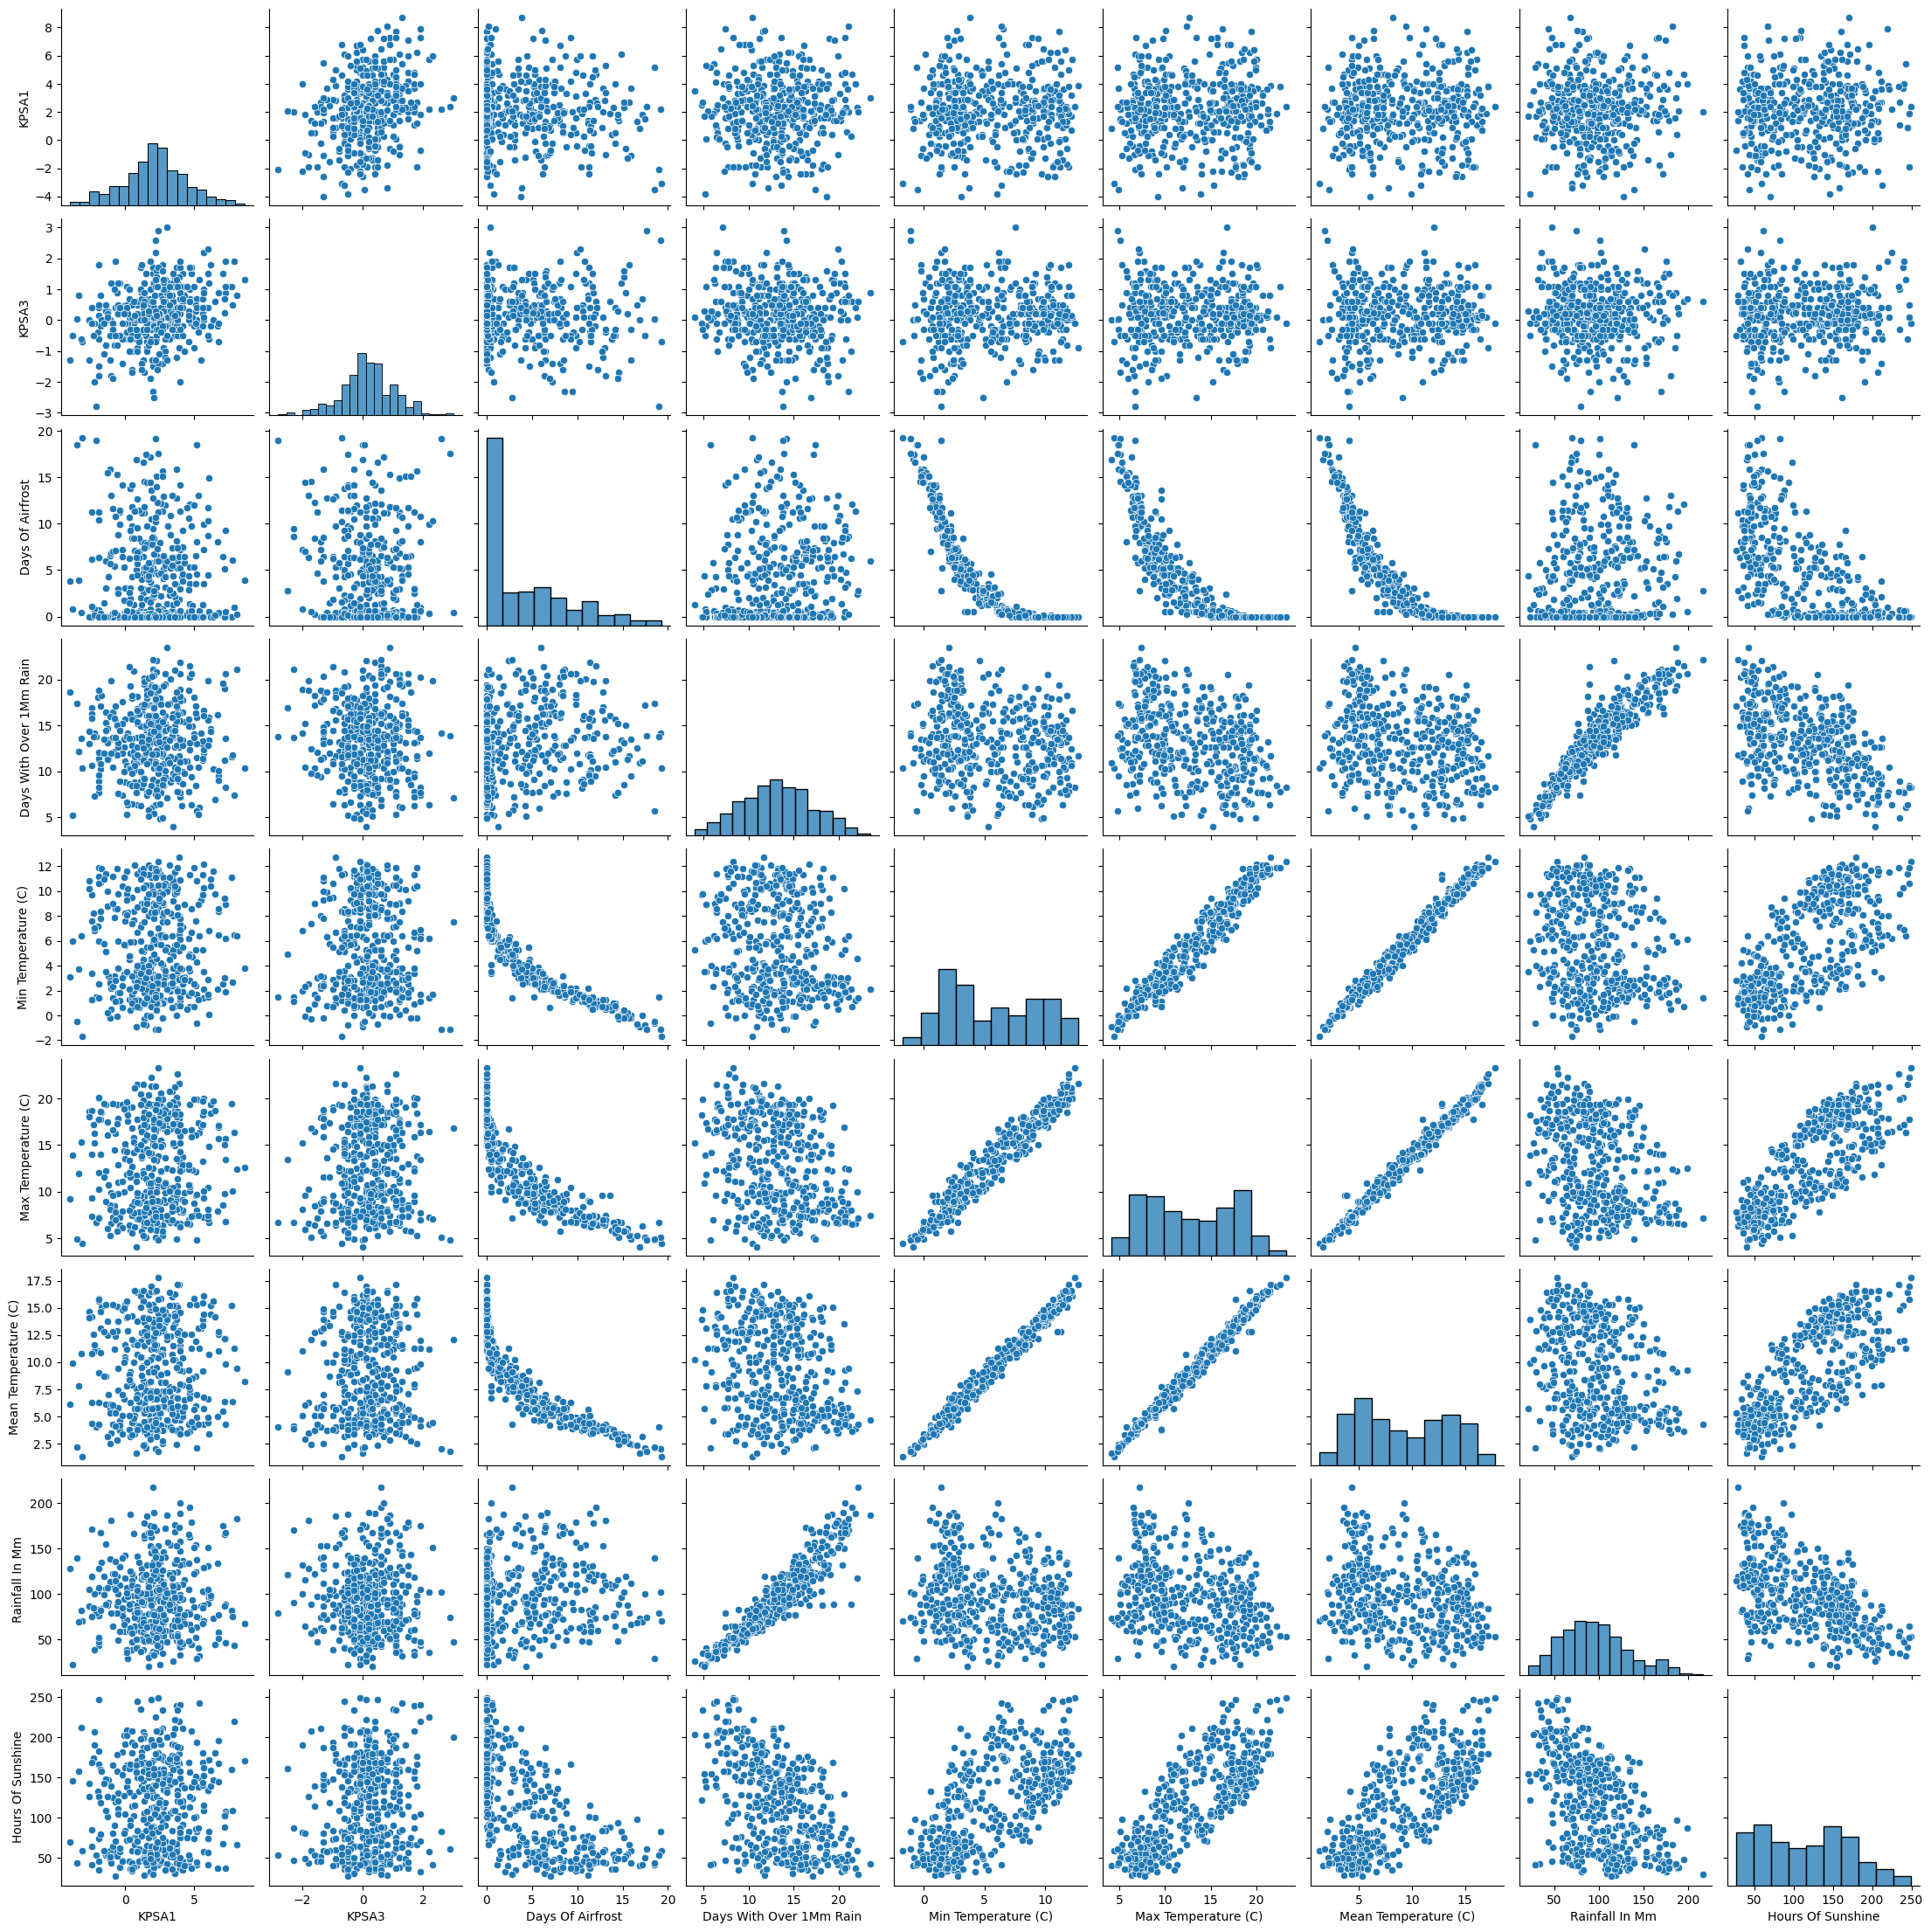

In [252]:
# Now we can look at some bivariate statistical summaries and interpret them
sns.pairplot(df_without_outliers)